<a href="https://colab.research.google.com/github/ilante/AML_91934_exam/blob/main/Englander_AML_1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My First Machine Learning Project

## Fashion-MNIST 

### International Master of Bioinformatics, University of Bologna

#### Immanuela Antigone Engländer

## 1. Aim of this Project

The goal of this project is to apply several Machine Learning approaches for the clasiffication of 10 different labels

First, a *Exploratory Data Analysis* will be performed to summarize the main features of the dataset. Then, after processing the data, different Machine Learning (ML) methods will be compared in terms of accuracy score. The ML methods developed are:

1. Artificial Neural Network (ANN)
2. Convolutional Neural Network (CNN)
2. k-nearest neighbors (k-NN)
3. Support Vector Machine (SVM)
4. Decision Tree (DT)
5. Random Forest (RF)

For training and testing the machine learning methods I will be using either train-test splits sometimes also in combination with 5-fold cross-validation where I will be testing the final model on a **hold out set** or **blind test set**. Different statistical measures are computed for the best model obtained:

- The **F1 score** can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

  F1 = 2 * (precision * recall) / (precision + recall)
In the multi-class and multi-label case, this is the average of the F1 score of each class with weighting depending on the average parameter.

- **accuracy** is the proportion of correct predictions (both true positives and true negatives) among the total number of cases examined

  $ACC = \frac{TP + TN}{TP + TN + FP + FN}$

- **recall** (also known as true positive rate or sensitivity) is the proportion of positives that are correctly identified;

  $TPR = \frac{TP}{TP + FN}$ 

- **precision** (also known as positive predicted value) is the fraction of correct positive prediction over the total of positive predictions;

  $PPV = \frac{TP}{TP + FP}$


- **confusion matrix**: is a specific table storing the number of true positives (TP), true negative (TN), false positive (FP) and false negative (FN) that have been predicted by a supervised ML method


The best method is selected according to the highest mean accuracy score between train-test split and *k*-fold cross-validation. At the end, Ensamble methods are developed to study if the final accuracy reached by single ML apporaches can be improved.

# 1.1 Background of the Data Set

The dataset is taken from Zalando's article images with a considerable size of 60 000 samples and a test set of 10 000 samples. Each sample is a 28x28 grayscale image, associated with a label from 10 classes. The Fashion-MNIST serves as a variant of original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

I choose it to be sure that I don't have the same project as my fellow students.

Here an example of how the data looks like

![](https://raw.githubusercontent.com/ilante/AML_91934_exam/main/fashion-mnist-example-img.png)

The authors of Fashion-MNIST argue that it may replace the original MNIST. So far the original has been used as a benchmark. But they argue that the original may be to simple. Reasons to choose Fashion-MNIST over the original are:

* **MNIST is too easy**. Convolutional nets can achieve 99.7% on MNIST. Classic machine learning algorithms can also achieve 97% easily. Check out our side-by-side benchmark for Fashion-MNIST vs. MNIST, and read "Most pairs of MNIST digits can be distinguished pretty well by just one pixel."

* **MNIST is overused.** In [this April 2017 Twitter thread](https://twitter.com/goodfellow_ian/status/852591106655043584), Google Brain research scientist and deep learning expert Ian Goodfellow calls for people to move away from MNIST.
* **MNIST can not represent modern CV tasks**, as noted in [this April 2017 Twitter thread](https://twitter.com/fchollet/status/852594987527045120), deep learning expert/Keras author François Chollet.


## Reference of Fashion-MNIST:

https://arxiv.org/abs/1708.07747 

Here the abstract;

![](https://raw.githubusercontent.com/ilante/AML_91934_exam/main/citation.png)

# 2. Importing the Required Libraries

In [6]:
# to disconnect the runtime
# that way I can reconnect before going to bed and train a model on the full
# 12hrs they allocate per session

# !kill -9 -1

time: 1.04 ms (started: 2021-12-15 00:09:21 +00:00)


In [7]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Dec 15 00:09:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    33W / 250W |    375MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!
time: 4.5 ms (started: 2021-12-15 00:09:22 +00:00)


In [9]:
# # !pip install -q colabcode
# # from colabcode import ColabCode

# # Loading module to monitor time:
!pip install ipython-autotime
%load_ext autotime

# to measure execution time
import time

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.25 s (started: 2021-12-15 00:09:22 +00:00)


Libraries:

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import sklearn

# k-fold Cross Validation
from sklearn.model_selection import cross_val_score
# PCA
from sklearn.decomposition import PCA
# SVM
from sklearn.svm import SVC
from sklearn import metrics
# Grid search for SVM: maybe make smaller test runs for gridsearch???
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
# KNN
from sklearn.neighbors import KNeighborsClassifier
# DT
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
# RF
from sklearn.ensemble import RandomForestClassifier

time: 10.4 ms (started: 2021-12-15 00:09:26 +00:00)


In [11]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0
time: 8.41 ms (started: 2021-12-15 00:09:26 +00:00)


We import the Fashion-MNIST set from keras in an already vectorized numpy format:

In [12]:
f_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = f_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# REMEMBER TO run cell that changes the range from [0, 255] to [0, 1] 
# when rerunning

4431872/4422102 [==============================] - 0s 0us/step
time: 1 s (started: 2021-12-15 00:09:26 +00:00)


In [13]:
tr_labels = train_labels #incase some formatting happenes inplace
te_labels = test_labels  #incase some formatting happenes inplace

time: 1.56 ms (started: 2021-12-15 00:09:27 +00:00)


In [14]:
print(type(train_images))
print(type(train_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
time: 2.08 ms (started: 2021-12-15 00:09:27 +00:00)


In [15]:
copy_train_labels = train_labels
train_labels_list = copy_train_labels.tolist()
print(type(train_labels_list))

copy_test_labels = test_labels
test_labels_list = copy_test_labels.tolist()
print(type(test_labels_list))

<class 'list'>
<class 'list'>
time: 4.12 ms (started: 2021-12-15 00:09:27 +00:00)


In [16]:
print("The data set contains 10 different classes: ")
for i in range(len(class_names)):
  print(str(i)+'. ', class_names[i])

The data set contains 10 different classes: 
0.  T-shirt/top
1.  Trouser
2.  Pullover
3.  Dress
4.  Coat
5.  Sandal
6.  Shirt
7.  Sneaker
8.  Bag
9.  Ankle boot
time: 2.76 ms (started: 2021-12-15 00:09:27 +00:00)


# 2.1 Exploring the Data

Lets see how many samples we got;

In [17]:
# inspect train_images
print('train_images: ', train_images.shape)
# n of labels:
print('n of train_labels: ', len(train_labels))
print('\n')
# inspect test_images
print('test_images: ', test_images.shape)
# n of labels in test set
print('n labels in test_images: ', len(test_labels))

train_images:  (60000, 28, 28)
n of train_labels:  60000


test_images:  (10000, 28, 28)
n labels in test_images:  10000
time: 4.74 ms (started: 2021-12-15 00:09:27 +00:00)


# 2.2 Preprocessing and Reshaping the Data

By inspecting an original image we can see that it is scaled in the range [0, 255] but we prefer to have a scaling from [0, 1] &rarr; thus we have to divide each pixel value by **255**.

Below an image of a pullover item 707 from the training set.



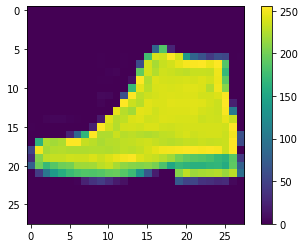

time: 377 ms (started: 2021-12-15 00:09:27 +00:00)


In [18]:
plt.figure()
plt.imshow(train_images[42])
plt.colorbar()
plt.grid(False)

# !!!!!! Normalizing the data run everytime you restart!!!

The images inside f_minst are black and white and you get a value between 0 and 255. Where black is 0.
We convert **both** training AND testing set to scale from [0, 1]:

In [19]:
train_images = train_images/255.0
test_images = test_images/255.0

time: 213 ms (started: 2021-12-15 00:09:27 +00:00)


# 2.3 Example images from both training - and testing set:

Here  9 examples from the training set:


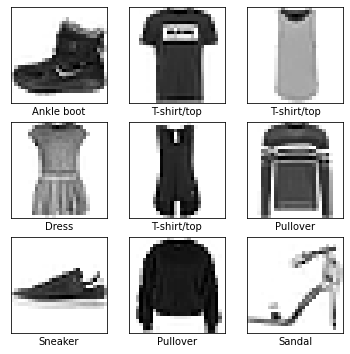

time: 429 ms (started: 2021-12-15 00:09:27 +00:00)


In [20]:
plt.figure(figsize=(6,6))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

Here nine sample images of the testing set:

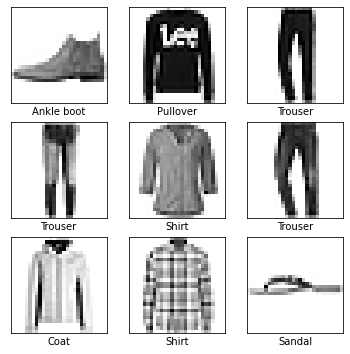

time: 404 ms (started: 2021-12-15 00:09:28 +00:00)


In [21]:
plt.figure(figsize=(6,6))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[test_labels[i]])
plt.show()

# 2.4 Visualizing the Distribution of Classes within Training and Testing set:

It is crucial to inspect the distribution of classes, as a skewed data set is prone to overfitting and not able to generate a model that is able to **generalize for unseen data**. We decided to do a count plot as it is a good way to visualize the distribution of classes. The first figure shows the distribution of the 9 classes of the training set, while the second figure shows the distribution of the testing set. We can appreciate that both sets are balanced.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'count'), Text(0.5, 0, 'classes')]

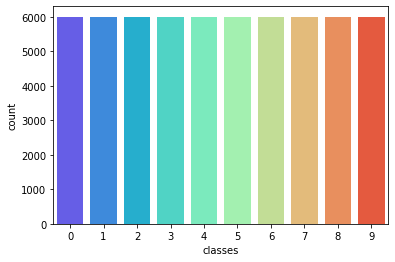

time: 271 ms (started: 2021-12-15 00:09:28 +00:00)


In [22]:
# Plotting dist. training set:
count_plt = sns.countplot(train_labels,palette="rainbow")
count_plt.set(xlabel='classes', ylabel='count')

In [23]:
# distribution of labels in training set
for i in range(10):
  print(train_labels_list.count(i),'of class', i , class_names[i])

6000 of class 0 T-shirt/top
6000 of class 1 Trouser
6000 of class 2 Pullover
6000 of class 3 Dress
6000 of class 4 Coat
6000 of class 5 Sandal
6000 of class 6 Shirt
6000 of class 7 Sneaker
6000 of class 8 Bag
6000 of class 9 Ankle boot
time: 16 ms (started: 2021-12-15 00:09:28 +00:00)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'count'), Text(0.5, 0, 'classes')]

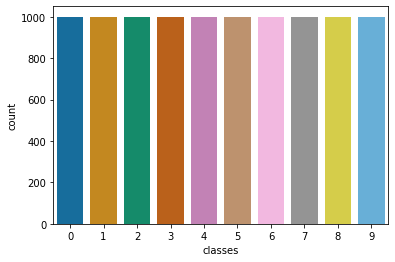

time: 243 ms (started: 2021-12-15 00:09:29 +00:00)


In [24]:
# Plotting dist. testing set:
count_plt = sns.countplot(test_labels,palette="colorblind")
count_plt.set(xlabel='classes', ylabel='count')

In [25]:
# distribution of labels in testing set
for i in range(10):
  print(test_labels_list.count(i),'of class', i , class_names[i])

1000 of class 0 T-shirt/top
1000 of class 1 Trouser
1000 of class 2 Pullover
1000 of class 3 Dress
1000 of class 4 Coat
1000 of class 5 Sandal
1000 of class 6 Shirt
1000 of class 7 Sneaker
1000 of class 8 Bag
1000 of class 9 Ankle boot
time: 9.31 ms (started: 2021-12-15 00:09:29 +00:00)


## 2.4.1 Pixel Distribution of the Differnet Classes

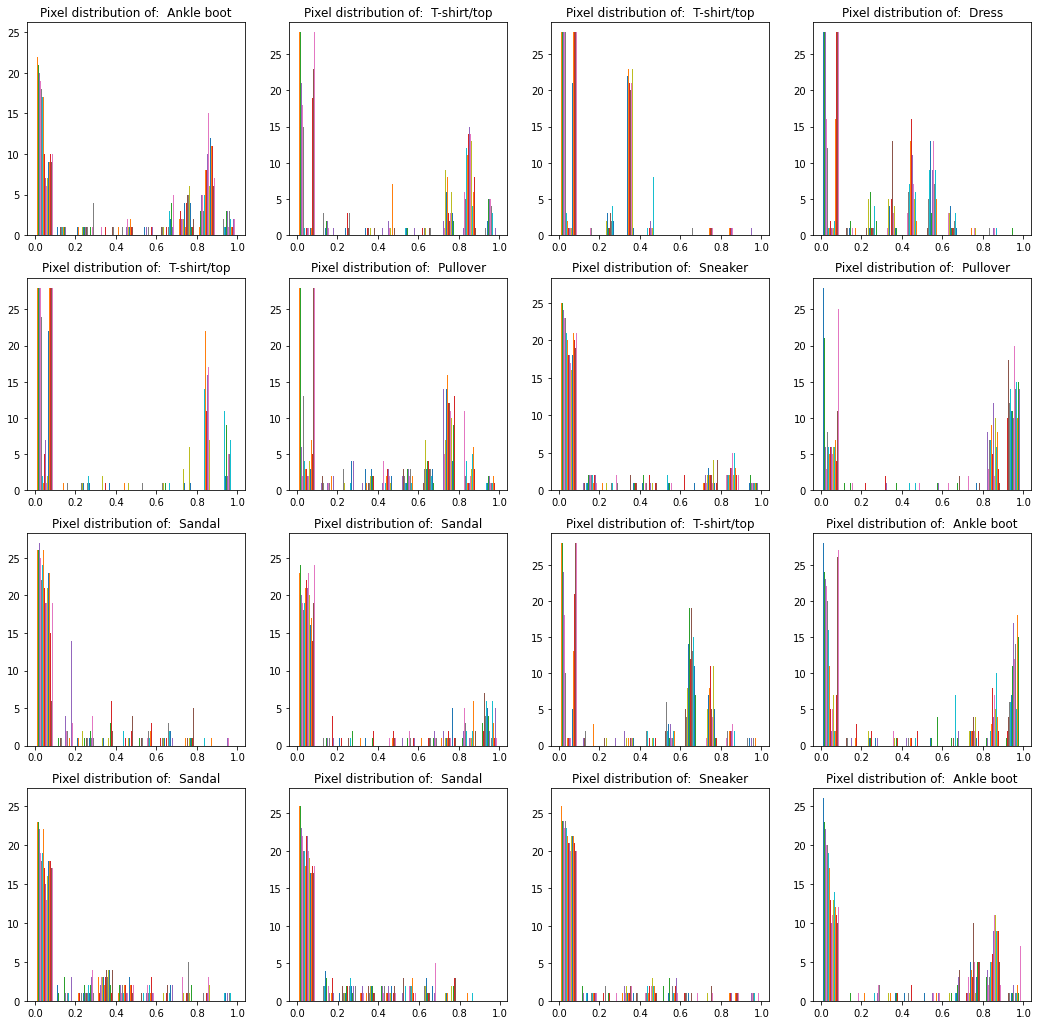

time: 12.9 s (started: 2021-12-15 00:09:29 +00:00)


In [26]:
plt.figure(figsize=(18,18))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.hist(train_images[i])
  plt.title(f'Pixel distribution of:  {class_names[train_labels[i]]}')
plt.show()

# 3 Building Models using two types of Neural Networks

First I will implement a basic Artificial Neural Networks (ANN) followed by a Convolutional Neural Network (CNN).


## 3.1 Basic Artificial Neural Network


ANN are a subeset of ML methods that are at the core of deep learning algorithms. Their structure was inspired by the biological neurons of the brain which coined their name Neural Networks (NN).

NNs are made of a node layers that contain an input layer, one or more hidden layers and an output layer. Each artificial neuron connects to another and has an associated threashold and and associated weight.

To build the NN we have to configure the layers of the model before compiling it.

### 3.1.1 Setting up the Layers of the NN

The layers are the basic building blocks of an NN and extract the representations from the given data. Most of deep learning consists of chaining together these layers. Layers as `tf.keras.layres.Dense` have apramenters that are learned during the training. 

For our training we will use the Rectified Linear Unit (ReLU). It is a simple calculation that returns the value provided as input directly, or the value 0.0 if the input is 0.0 **or less** [see](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).

Here and image of the ReLU:

![](https://s2.qwant.com/thumbr/474x351/f/e/354d8f54c966180968777154786e5562a78953d12002e5e24010e54e3cfcf1/th.jpg?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.FZ3MiYnlLaNu6igVodW4LQHaFf%26pid%3DApi&q=0&b=1&p=0&a=0)



The first layer in my network `tf.keras.layers.Flatten` transforms the format of the images from a 2-dimensional array
(of 28 * 28 = 748 pixles) to a one dimensional array holding 784 pixels
This layer basically is 'unstacking' the rows of pixles in the image and lining them up.
This layer does NOT have to learn any parameters; it only reformats the data.

In [27]:
nn_cls = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


time: 109 ms (started: 2021-12-15 00:09:42 +00:00)


In [28]:
nn_cls.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
time: 4.33 ms (started: 2021-12-15 00:09:42 +00:00)


After flattening the pixels, the network is composed of a sequence of two `tf.keras.layers.Dense` layers. They are densely connected, or fully connected neural layers. The first layer has 128 neurons. The last layer returns a logits array of lenght 10. Each neuron will contain a score for the current image corresponding to the classes.

### 3.1.2 Compiling the Model

To get the model ready for training it needs some more settings. We add them during the model's **compile** step.

* We need to set a **loss function** (aka error function). It measures how accurate the model is during the training. Obviously we want to minimize this function to minimize the error and 'steer' the model into the right direction.
* We need an **optimizer** which defines how the model is updated based on the data that it is given and depending on the **loss function**. Here we use an optimizer that implements the Adam algorithm.
* Metrics are used for monitoring training and testing steps. Here we use accuracy = the fraction of images that are correctly classified.



In [29]:
nn_cls.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


time: 12.6 ms (started: 2021-12-15 00:09:42 +00:00)


### 3.1.3 Training the Model

The training of a nn model requires 4 steps:

1. Feeding the training data to the model. The training data here is held by the two arrays; `train_images` and `train_labels`

2. The model has to learn the associated images and labels

3. Testing the model by making predictions on an independent test set &rarr; `test_images` array

4. Verifying that the predictions made actually match the labels by comparing the predicted lables to the `test_labels` array

### 3.1.4 Feeding the Model

To initiate training we call the `model.fit` method. The name is very descriptive. As it fits the model to the training data.

In [30]:
start_nn = time.time()
# training
nn_history = nn_cls.fit(train_images, 
                        train_labels, 
                        epochs=10)
end_nn = time.time()
nn_time = end_nn-start_nn

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5028 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3800 - accuracy: 0.8632
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3405 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3154 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2955 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2825 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2688 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2579 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2451 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

We can see how the model trains and in the starndard output above we see accuracy in output for each epoch. Our model reaches an accuracy of ~ 0.91 = 91% of the images in the training set are correctly classified.

### 3.1.5 Evaluating the Accuracy on our Testing set

In [31]:
test_loss, test_acc = nn_cls.evaluate(test_images,  test_labels, verbose=3)

print('Test loos: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_acc))

Test loos: 0.33150315284729004
Test accuracy: 0.8853999972343445
time: 816 ms (started: 2021-12-15 00:10:27 +00:00)


We can see that the accuracy was slightly lower with only ~ 88.3% of images correctly classified. The difference between the training and testing accuracy can be explained by *overfitting*. So we know that the model has 'memorized' the noise and details in the training dataset this leads to the slightly lower performance on the testing set (or any new unseen data).

We can mitigate overfitting by:

* Getting more training data
* Reducing the capacity of the network
* Adding weight regularization
* Adding dropout
* Data augmentation
* Batch normalization

Usually it is best to combine the above methods.

As the goal for this project is to show several methods, we wil however continue with the model as is.


### 3.1.6 Testing the Model by Making Predictions on an Independent Test Set 

The independent testing set is our `test_images` array. Logits is the vector of raw (non-normalized) predicitons that a classification model generates. It is then passed to a normalization function, in our case the `softmax` function. The `softmax` function generates a vector of normalized probabilities with one value for each possible class. These probabilities are easy to interpret.

In [32]:
probability_model = tf.keras.Sequential([nn_cls, tf.keras.layers.Softmax()])
nn_predictions = probability_model.predict(test_images)


time: 515 ms (started: 2021-12-15 00:10:28 +00:00)


Now the model has predicted the label of **each** image in the **testing_set**. Below we are inspecting the first prediction:

In [33]:
print(nn_predictions[0])
print(len(nn_predictions[0]))

[4.3860059e-08 4.4194000e-09 2.4589411e-09 3.3387264e-09 7.2119682e-10
 1.0676033e-02 1.3875554e-07 2.0503290e-02 4.4875364e-07 9.6882010e-01]
10
time: 2.58 ms (started: 2021-12-15 00:10:28 +00:00)


We can appreciate that each prediciton is an array of 10 numbers, which represent the models confidence that the image corresponds to each of the 10 different classes (labels of clothing). The label with the highest confidence is the class called for the item.

In [34]:
print(np.argmax(nn_predictions[0]))

print('\n') # forcing autotime to print into next line


9


time: 2.03 ms (started: 2021-12-15 00:10:28 +00:00)


In [35]:
class_names[9]

'Ankle boot'

time: 3.58 ms (started: 2021-12-15 00:10:28 +00:00)


We now know that the model is most confident that the class of that the image is an ankle boot. To find out weather this call was correct we can examine the `test_labels`:

In [36]:
test_labels[0] # dunno why time module is printed right after 9 in interactive...

9

time: 3.26 ms (started: 2021-12-15 00:10:28 +00:00)


### 3.1.7 Visualizing Predictions

First we write functions to visualize the full set of 10 class predictions.

Then we make predictions about some images using the trained model.



In [37]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')


time: 15.3 ms (started: 2021-12-15 00:10:28 +00:00)


As you can see in the function above: correctly classified images are labelled green while wrongly classified ones are red.

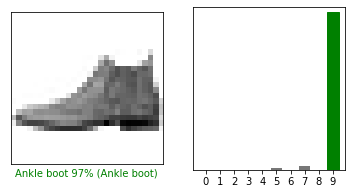

time: 166 ms (started: 2021-12-15 00:10:29 +00:00)


In [38]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, nn_predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, nn_predictions[i],  test_labels)
plt.show()


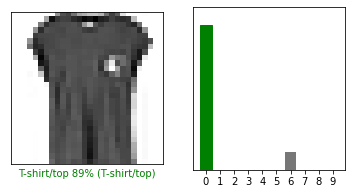

time: 187 ms (started: 2021-12-15 00:10:29 +00:00)


In [39]:
i = 113
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, nn_predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, nn_predictions[i],  test_labels)
plt.show()


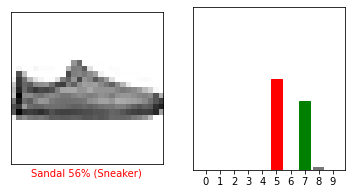

time: 180 ms (started: 2021-12-15 00:10:29 +00:00)


In [40]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, nn_predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, nn_predictions[i],  test_labels)
plt.show()


Below we are plotting several images including their predictions in a grid: We can see that the model can be wrong (red) even if it is very confident.

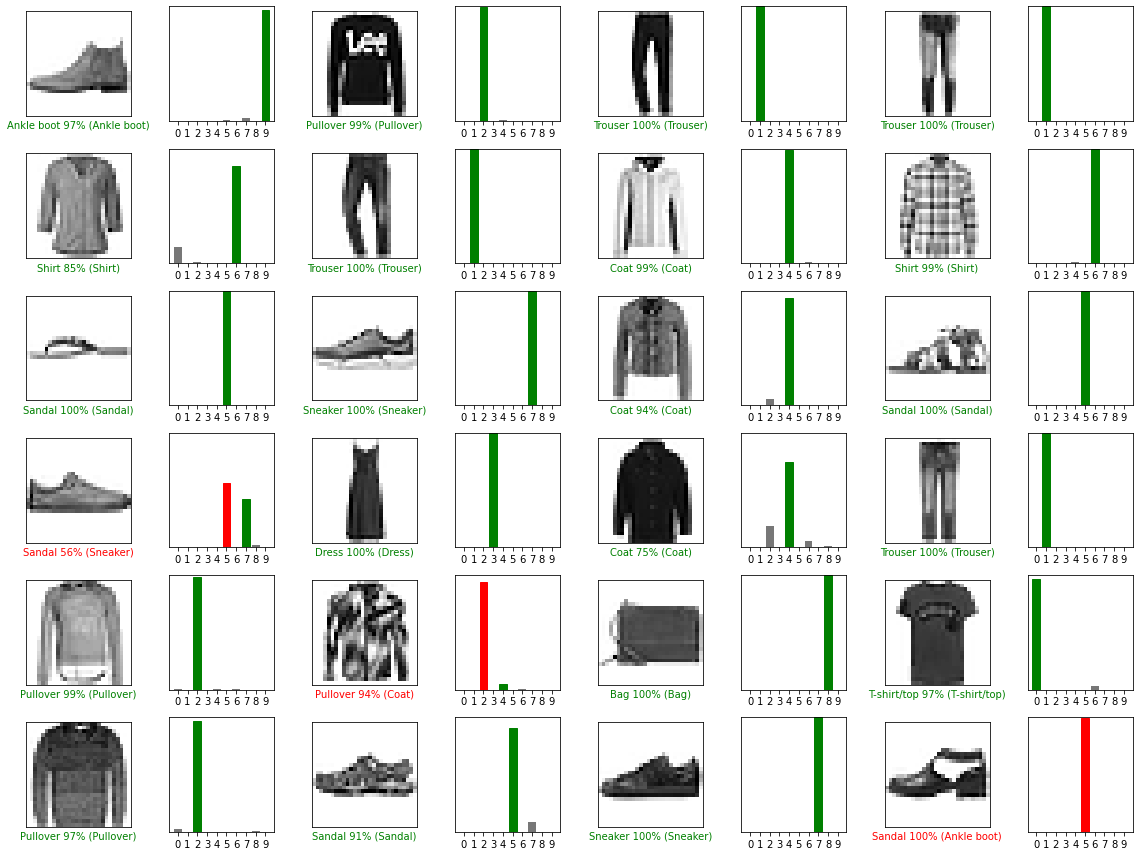

time: 4.74 s (started: 2021-12-15 00:10:29 +00:00)


In [41]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, nn_predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, nn_predictions[i], test_labels)
plt.tight_layout()
plt.show()


### 3.1.8 Connfusion Matrix of my Neural Network Classifier

In [42]:
# predicted = model1.predict(X_test) 
test_predicted = np.argmax(nn_predictions, axis=1) #predictions
# generating confusion matrix using the test set labels and the predictions of the test set:
nn_confusion = confusion_matrix(test_labels, test_predicted)
# print(nn_confusion)

time: 5.02 ms (started: 2021-12-15 00:10:34 +00:00)


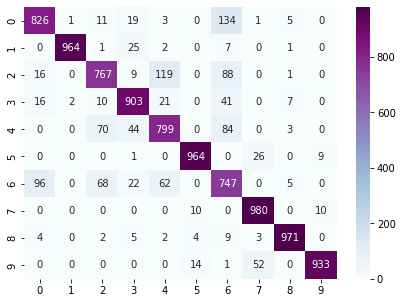

time: 662 ms (started: 2021-12-15 00:10:34 +00:00)


In [43]:
f,ax = plt.subplots(figsize=(7,5))
sns.heatmap(nn_confusion, annot=True, cmap="BuPu", fmt='',ax=ax)
plt.show()

In [44]:
print(type(class_names))
for i in class_names:
  print(i, end=", ")

<class 'list'>
T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot, time: 1.63 ms (started: 2021-12-15 00:10:35 +00:00)


In [45]:
# generating list of true positives:
tp_list = [] 
for i in range(len(nn_confusion)):
  print(nn_confusion[i][i], class_names[i])
  tp_list.append(nn_confusion[i][i])

print('\n')
print('True positives: ')
print(tp_list, '\n')
tp_list.sort()
print('True positives sorted: ')
print(tp_list, '\n')

826 T-shirt/top
964 Trouser
767 Pullover
903 Dress
799 Coat
964 Sandal
747 Shirt
980 Sneaker
971 Bag
933 Ankle boot


True positives: 
[826, 964, 767, 903, 799, 964, 747, 980, 971, 933] 

True positives sorted: 
[747, 767, 799, 826, 903, 933, 964, 964, 971, 980] 

time: 5.32 ms (started: 2021-12-15 00:10:35 +00:00)


### 3.1.9 Discussing the differences in true positives

The NN method achieved and overall accuracy of 0.88 on the testing set. Looking at the diagonal in the heatmap above we can see all true positives (TP). That is, the predicted class is in congruence with the label of the class.

I have extracted all TP into a list and sorted them from smallest to largest. As outlined in data exploration the classes of the **testing set** were completely balanced thus we can draw direct conclusions.

Labels sorted from least TP to highest TP value:

1. Shirt 631 
2. Coat 811
3. Pullover 841
4. T-Shirt/top 853
5. Dress 882
6. Sneaker 926
7. Sandal 940
8. Trouser 972
9. Bag 980
10. Ankle boot 983

The first three might have had these lower scores given their similar pixle distribution. It is evident to the human eye that shirts coats and pullovers all have the same shape. While the difference in shape between sandals, ankle boots and sneakers is more pronounced and thus might lead to a pixel profile that is more distinguishable.

## 3.2 Convolutional Neural Networks




As peviously discussed NNs are a subset of ML methods which are at the heart of deep learning algorithms. These netwoks are layered 

In [46]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from keras.utils.np_utils import to_categorical # for 'one hot encoding' ohe
from keras.callbacks import EarlyStopping # to stop training when val loss flattens

time: 3.74 ms (started: 2021-12-15 00:10:35 +00:00)


We will take advantage of the GPU that colab provides by changing the runtime type.

I have already scaled the data from [0, 1] in a [cell in part 2.2].

In [47]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)
time: 1.42 ms (started: 2021-12-15 00:10:35 +00:00)


In [48]:
# copying into new vars as other methods that I will use later 
# require different shape of the input data.
trn_im_cnn = train_images
tst_im_cnn = test_images

time: 1.31 ms (started: 2021-12-15 00:10:35 +00:00)


In [49]:
type(trn_im_cnn[0][0][0])

numpy.float64

time: 4.59 ms (started: 2021-12-15 00:10:35 +00:00)


In [50]:
# Reshaping to convert the array from 3 to 4 dimensions
trn_im_cnn = trn_im_cnn.reshape(trn_im_cnn.shape[0], 28, 28, 1)
tst_im_cnn = tst_im_cnn.reshape(tst_im_cnn.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# converting float64 to float32
trn_im_cnn = trn_im_cnn.astype('float32')
tst_im_cnn = tst_im_cnn.astype('float32')


time: 92.1 ms (started: 2021-12-15 00:10:35 +00:00)


In [51]:
print('Converted to 4 dimensions:')
print(trn_im_cnn.shape) 
print(tst_im_cnn.shape) 
print('Converted to float32:')
print(type(trn_im_cnn[0][0][0]))

Converted to 4 dimensions:
(60000, 28, 28, 1)
(10000, 28, 28, 1)
Converted to float32:
<class 'numpy.ndarray'>
time: 3.34 ms (started: 2021-12-15 00:10:35 +00:00)


# One hot encoding


In [52]:
# Changing labels encoding from [0,9] to a categorical format
# One hot encoding: ohe

nclasses = 10
trn_labels_ohe = to_categorical(train_labels, num_classes = nclasses )
tst_labels_ohe = to_categorical(test_labels, num_classes = nclasses )
print('before:')
print('Shape of train_labels: ', train_labels.shape) 
print('Shape of test_labels: ', test_labels.shape)
print('One hot encoding:')
print('Shape of train_labels: ', trn_labels_ohe.shape) 
print('Shape of test_labels: ', tst_labels_ohe.shape)

before:
Shape of train_labels:  (60000,)
Shape of test_labels:  (10000,)
One hot encoding:
Shape of train_labels:  (60000, 10)
Shape of test_labels:  (10000, 10)
time: 12.6 ms (started: 2021-12-15 00:10:35 +00:00)


 # Basic CNN Model

In [53]:
# need the GPU in colab
# When scoring a bunch GPU could give the following error: ResourceExhaustedError
# Because the GPU might not have enough ram to predict the entire set at once 

time: 1.14 ms (started: 2021-12-15 00:10:35 +00:00)


Convolutions, Subsampling, Convolutions, Subsampling, Full connection

train test splits are the way so EVERYBODY has the same input for publications

NN deal best with data within the same range [0,1] or you could center it on 0

In [54]:
# model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 15, callbacks = [es])


time: 671 µs (started: 2021-12-15 00:10:35 +00:00)


In [55]:
cnn_model_1 = Sequential()

cnn_model_1.add(Conv2D(32, (3, 3), 
                activation='relu',
                strides=1,
                padding='same', 
                kernel_initializer='he_uniform', 
                input_shape=(28, 28, 1)))
cnn_model_1.add(MaxPool2D((2, 2)))
cnn_model_1.add(Flatten())
cnn_model_1.add(Dense(100, 
                      activation='relu', 
                      kernel_initializer='he_uniform'))
cnn_model_1.add(Dense(nclasses, activation='softmax'))

# early stopping
es_callback = EarlyStopping(monitor = 'val_loss',
                   min_delta=1e-3, 
                   patience = 5,
                   verbose = 1,
                   mode='auto',
                   restore_best_weights=True)

# es_callback: early stopping callback will stop the training when there is 
# no improvement in the loss for 5 consecutive epochs.

time: 56.6 ms (started: 2021-12-15 00:10:35 +00:00)


Given we are dealing with a multi-class classification problem I chose the [categorical cross entropy function](https://vitalflux.com/keras-categorical-cross-entropy-loss-function/). It requires the `one_hot` representation [see docs](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) and [math behind it](https://gombru.github.io/2018/05/23/cross_entropy_loss/).

In [56]:
cnn_model_1.compile(optimizer="adam", 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

cnn_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               627300    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 628,630
Trainable params: 628,630
Non-trainable params: 0
________________________________________________

In [57]:
history = cnn_model_1.fit(x=trn_im_cnn,
                              y=trn_labels_ohe,
                              epochs=100, 
                              batch_size=256, 
                              validation_split=0.3,
                              verbose=1)



len(history.history['loss'])  

Epoch 1/100
165/165 [==============================] - 9s 8ms/step - loss: 0.5332 - accuracy: 0.8131 - val_loss: 0.4002 - val_accuracy: 0.8578
Epoch 2/100
165/165 [==============================] - 1s 6ms/step - loss: 0.3264 - accuracy: 0.8842 - val_loss: 0.3302 - val_accuracy: 0.8814
Epoch 3/100
165/165 [==============================] - 1s 6ms/step - loss: 0.2810 - accuracy: 0.8989 - val_loss: 0.3031 - val_accuracy: 0.8898
Epoch 4/100
165/165 [==============================] - 1s 6ms/step - loss: 0.2514 - accuracy: 0.9084 - val_loss: 0.3178 - val_accuracy: 0.8871
Epoch 5/100
165/165 [==============================] - 1s 6ms/step - loss: 0.2349 - accuracy: 0.9137 - val_loss: 0.2694 - val_accuracy: 0.9020
Epoch 6/100
165/165 [==============================] - 1s 6ms/step - loss: 0.2066 - accuracy: 0.9253 - val_loss: 0.2751 - val_accuracy: 0.9028
Epoch 7/100
165/165 [==============================] - 1s 6ms/step - loss: 0.1920 - accuracy: 0.9306 - val_loss: 0.2687 - val_accuracy: 0.9073

100

time: 1min 50s (started: 2021-12-15 00:10:35 +00:00)


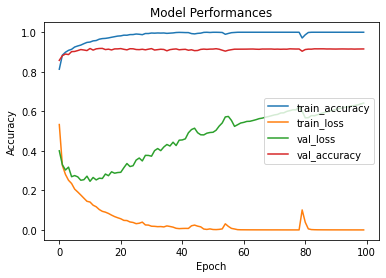

time: 208 ms (started: 2021-12-15 00:12:26 +00:00)


In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Performances')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_accuracy','train_loss','val_loss','val_accuracy'],loc='right')
plt.show()

Above we can appreciate how neither the training accuracy nor the validation accuracy improve while the validation loss is increasing. This is why I will train the model again using an option that allowes for early stopping. It saves time and saves the best ways to the model.

```
# early stopping
es_callback = EarlyStopping(monitor = 'val_loss',
                   min_delta=1e-3, 
                   patience = 5,
                   verbose = 1,
                   mode='auto',
                   restore_best_weights=True)
```

It is called in the function below: `callbacks=[es_callback]`

In [59]:
start_cnn = time.time() # timer for comparing to other methods
history = cnn_model_1.fit(x=trn_im_cnn,
                              y=trn_labels_ohe,
                              epochs=100, 
                              batch_size=256,
                              callbacks=[es_callback], 
                              validation_split=0.3,
                              verbose=1)



len(history.history['loss'])  

end_cnn = time.time()
cnn_time = end_cnn-start_cnn

Epoch 1/100
165/165 [==============================] - 1s 7ms/step - loss: 1.9303e-04 - accuracy: 1.0000 - val_loss: 0.6451 - val_accuracy: 0.9152
Epoch 2/100
165/165 [==============================] - 1s 6ms/step - loss: 1.8260e-04 - accuracy: 1.0000 - val_loss: 0.6493 - val_accuracy: 0.9154
Epoch 3/100
165/165 [==============================] - 1s 6ms/step - loss: 1.6795e-04 - accuracy: 1.0000 - val_loss: 0.6544 - val_accuracy: 0.9156
Epoch 4/100
165/165 [==============================] - 1s 6ms/step - loss: 1.5586e-04 - accuracy: 1.0000 - val_loss: 0.6570 - val_accuracy: 0.9151
Epoch 5/100
165/165 [==============================] - 1s 6ms/step - loss: 1.4262e-04 - accuracy: 1.0000 - val_loss: 0.6605 - val_accuracy: 0.9154
Epoch 6/100
165/165 [==============================] - 1s 6ms/step - loss: 1.3120e-04 - accuracy: 1.0000 - val_loss: 0.6633 - val_accuracy: 0.9151
Epoch 00006: early stopping
time: 6.27 s (started: 2021-12-15 00:12:26 +00:00)


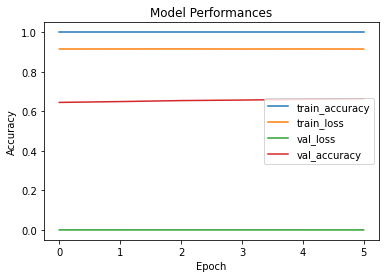

time: 219 ms (started: 2021-12-15 00:12:32 +00:00)


In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Performances')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_accuracy','train_loss','val_loss','val_accuracy'],loc='right')
plt.show()

## 3.2. Evaluating the CNN Model 1 on Test Data

In [61]:
score_ccn1 = cnn_model_1.evaluate(tst_im_cnn,tst_labels_ohe)
print("Test loss:", score_ccn1[0])
print("Test accuracy:", score_ccn1[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.7286 - accuracy: 0.9088
Test loss: 0.72859787940979
Test accuracy: 0.9088000059127808
time: 930 ms (started: 2021-12-15 00:12:32 +00:00)


# Confusion Matrix CNN Model 1

In [62]:
# # predicted = model1.predict(X_test) 
# test_predicted = np.argmax(nn_predictions, axis=1) #predictions
# # generating confusion matrix using the test set labels and the predictions of the test set:
# nn_confusion = confusion_matrix(test_labels, test_predicted)
# # print(nn_confusion)

time: 987 µs (started: 2021-12-15 00:12:33 +00:00)


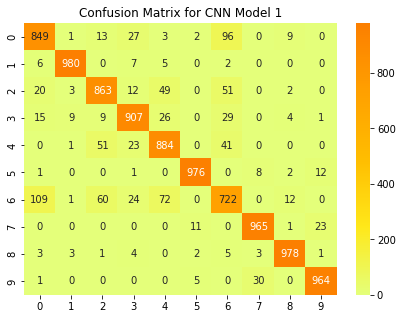

time: 1.23 s (started: 2021-12-15 00:12:33 +00:00)


In [63]:
cnn_1_pred = cnn_model_1.predict(tst_im_cnn)
# need to extract maximum values
cnn_1_pred_test = np.argmax(cnn_1_pred, axis=1)
# confusion matrix
cnn_1_confusion = confusion_matrix(test_labels, cnn_1_pred_test)

f,ax = plt.subplots(figsize=(7,5))
plt.title('Confusion Matrix for CNN Model 1')
plt.xlabel('Predicted character')
plt.ylabel('True character')
sns.heatmap(cnn_1_confusion,annot=True,cmap='Wistia',fmt='',ax=ax)
plt.show()

# Adding Layers to previous CNN

In [64]:
cnn_model_2 = Sequential()
# Must define the input shape in the first layer of the neural network
cnn_model_2.add(Conv2D(filters=64, kernel_size=2, padding='same', 
                 activation='relu', input_shape=(28,28,1))) 
cnn_model_2.add(MaxPool2D(pool_size=2))
cnn_model_2.add(Dropout(0.3))
cnn_model_2.add(Conv2D(filters=32, kernel_size=2, 
                 padding='same', activation='relu'))
cnn_model_2.add(MaxPool2D(pool_size=2))
cnn_model_2.add(Dropout(0.3))
cnn_model_2.add(Flatten())
cnn_model_2.add(Dense(256, activation='relu'))
cnn_model_2.add(Dropout(0.5))
cnn_model_2.add(Dense(nclasses, activation='softmax'))

cnn_model_2.compile(optimizer="adam", 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

cnn_model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)         

In [65]:
history = cnn_model_2.fit(x=trn_im_cnn,
                              y=trn_labels_ohe,
                              epochs=300, 
                              batch_size=256,
                              validation_split=0.3,
                              verbose=1)


len(history.history['loss'])  

Epoch 1/300
165/165 [==============================] - 2s 11ms/step - loss: 0.8215 - accuracy: 0.6964 - val_loss: 0.4847 - val_accuracy: 0.8217
Epoch 2/300
165/165 [==============================] - 2s 9ms/step - loss: 0.5076 - accuracy: 0.8134 - val_loss: 0.4128 - val_accuracy: 0.8526
Epoch 3/300
165/165 [==============================] - 2s 9ms/step - loss: 0.4487 - accuracy: 0.8381 - val_loss: 0.3706 - val_accuracy: 0.8664
Epoch 4/300
165/165 [==============================] - 2s 9ms/step - loss: 0.4140 - accuracy: 0.8513 - val_loss: 0.3431 - val_accuracy: 0.8802
Epoch 5/300
165/165 [==============================] - 2s 9ms/step - loss: 0.3878 - accuracy: 0.8603 - val_loss: 0.3230 - val_accuracy: 0.8834
Epoch 6/300
165/165 [==============================] - 2s 9ms/step - loss: 0.3662 - accuracy: 0.8677 - val_loss: 0.3153 - val_accuracy: 0.8870
Epoch 7/300
165/165 [==============================] - 2s 9ms/step - loss: 0.3523 - accuracy: 0.8729 - val_loss: 0.2995 - val_accuracy: 0.892

300

time: 7min 49s (started: 2021-12-15 00:12:35 +00:00)


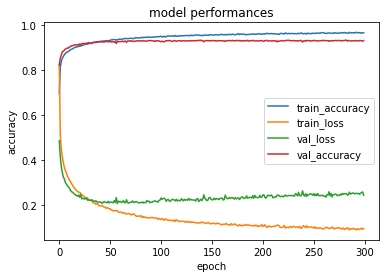

time: 226 ms (started: 2021-12-15 00:20:24 +00:00)


In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('model performances')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','train_loss','val_loss','val_accuracy'],loc='right')
plt.show()

From the plot we can see how both 'training accuracy' and 'validation accuracy' are plateauing while the 'validation loss' keeps on increasing.

Since we want a model that stops training at the sweet spot I will run the same model again but this time I will use the `tf.keras.callbacks.EarlyStopping` function. 

>It stops the training when a monitored metric has stopped improving.

I have defined it already for the first cnn model as follows:
```
# early stopping
es_callback = EarlyStopping(monitor = 'val_loss',
                   min_delta=1e-3, 
                   patience = 5,
                   verbose = 1,
                   mode='auto',
                   restore_best_weights=True)
```


The metric I picked is the validation loss (`val_loss`).

(See the docs)[https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping]

In [67]:
start_cnn2 = time.time() # timer for comparing to other methods

history = cnn_model_2.fit(x=trn_im_cnn,
                              y=trn_labels_ohe,
                              epochs=100, 
                              batch_size=256,
                              callbacks=[es_callback],
                              validation_split=0.3,
                              verbose=1)


len(history.history['loss'])  

end_cnn2 = time.time()
cnn2_time = end_cnn2-start_cnn2

Epoch 1/100
165/165 [==============================] - 2s 10ms/step - loss: 0.0956 - accuracy: 0.9648 - val_loss: 0.2382 - val_accuracy: 0.9298
Epoch 2/100
165/165 [==============================] - 2s 9ms/step - loss: 0.0938 - accuracy: 0.9650 - val_loss: 0.2439 - val_accuracy: 0.9292
Epoch 3/100
165/165 [==============================] - 2s 9ms/step - loss: 0.0904 - accuracy: 0.9656 - val_loss: 0.2510 - val_accuracy: 0.9290
Epoch 4/100
165/165 [==============================] - 2s 9ms/step - loss: 0.0894 - accuracy: 0.9664 - val_loss: 0.2469 - val_accuracy: 0.9294
Epoch 5/100
165/165 [==============================] - 2s 9ms/step - loss: 0.0935 - accuracy: 0.9656 - val_loss: 0.2462 - val_accuracy: 0.9299
Epoch 6/100
165/165 [==============================] - 2s 9ms/step - loss: 0.0937 - accuracy: 0.9644 - val_loss: 0.2417 - val_accuracy: 0.9286
Epoch 00006: early stopping
time: 9.6 s (started: 2021-12-15 00:20:24 +00:00)


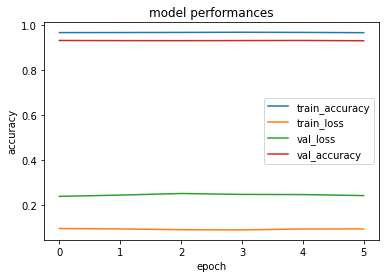

time: 209 ms (started: 2021-12-15 00:20:34 +00:00)


In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('model performances')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','train_loss','val_loss','val_accuracy'],loc='right')
plt.show()

## 3.2. Evaluating the CNN Model 2 on Test Data

In [69]:
score_ccn2 = cnn_model_2.evaluate(tst_im_cnn,tst_labels_ohe)
print("Test loss:", score_ccn2[0])
print("Test accuracy:", score_ccn2[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2697 - accuracy: 0.9255
Test loss: 0.26971620321273804
Test accuracy: 0.9254999756813049
time: 1.03 s (started: 2021-12-15 00:20:34 +00:00)


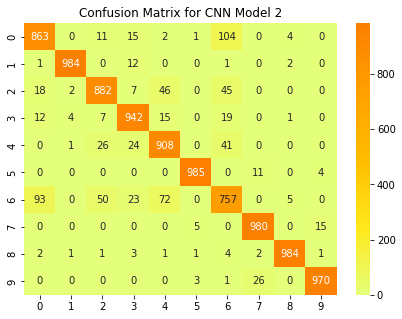

time: 1.31 s (started: 2021-12-15 00:20:35 +00:00)


In [70]:
cnn_2_pred = cnn_model_2.predict(tst_im_cnn)
# need to extract maximum values
cnn_2_pred_test = np.argmax(cnn_2_pred, axis=1)
# confusion matrix
cnn_2_confusion = confusion_matrix(test_labels, cnn_2_pred_test)

f,ax = plt.subplots(figsize=(7,5))
plt.title('Confusion Matrix for CNN Model 2')
plt.xlabel('Predicted character')
plt.ylabel('True character')
sns.heatmap(cnn_2_confusion,annot=True,cmap='Wistia',fmt='',ax=ax)
plt.show()

In [71]:
acc_on_test_cnn1 = metrics.accuracy_score(test_labels, cnn_1_pred_test)
acc_on_test_cnn2 = metrics.accuracy_score(test_labels, cnn_2_pred_test)

title1 = 'Accuracy of CNN Model 1: %.2f' % (acc_on_test_cnn1*100)
title2 = 'Accuracy of CNN Model 2: %.2f' % (acc_on_test_cnn2*100)

time: 6.37 ms (started: 2021-12-15 00:20:36 +00:00)


# Comparing Performance of CNN 1 and CNN 2

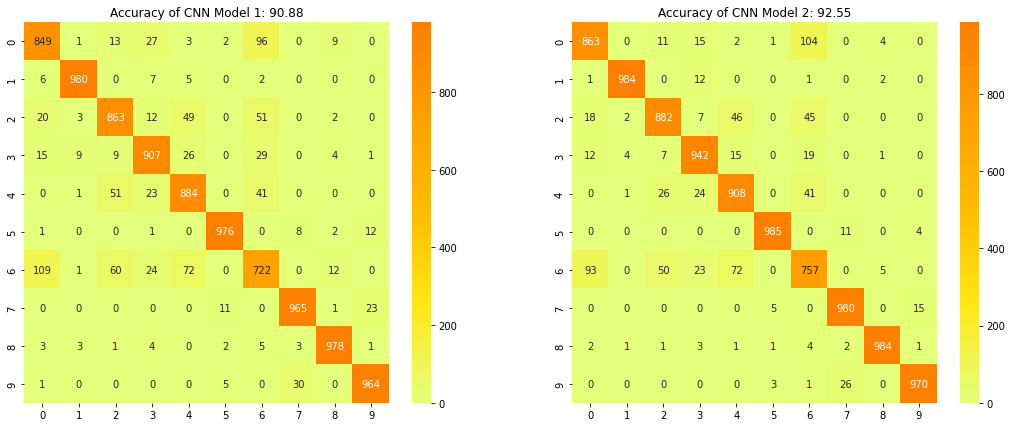


time: 1.43 s (started: 2021-12-15 00:20:36 +00:00)


In [72]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,7))
ax1.set_title(title1) 
ax1.set_xlabel('Predicted character')
ax1.set_ylabel('True character')
sns.heatmap(cnn_1_confusion,annot=True,cmap='Wistia',fmt='',ax=ax1)

ax2.set_title(title2) 
ax2.set_xlabel('Predicted character')
ax2.set_ylabel('True character')
sns.heatmap(cnn_2_confusion,annot=True,cmap='Wistia',fmt='',ax=ax2)
plt.show()

print()

In [73]:
print("CNN 1 test loss:", score_ccn1[0])
print("CNN 2 test loss:", score_ccn2[0])

CNN 1 test loss: 0.72859787940979
CNN 2 test loss: 0.26971620321273804
time: 2.01 ms (started: 2021-12-15 00:20:38 +00:00)


When inspecting the CNN plots of CNN 1 and CNN 2, we can see that each of the classes TPR value is higher in model 2 (right). Further the accuracy on the testing set of 10 000 images of CNN 1 was only 91.10% while it was 92,67% on CNN 2.

# 4 Support Vector Machines

A method developed by Cortes (currently head of Google Reseach!) and Vapnik in 1993.

## 4.1 Failed Grid Search evening Grid Search 5-fold CV: Failed due to Colab Timeout:

Colab has a limited runtime which I had to learn the hard way. First I tried to circumvent colab from disconnecting me due to inactivity druing training by using a small [script](https://github.com/ilante/AML_91934_exam/blob/main/stay_awake_click.py) that is run on my local terminal and emulates clicks in the cell above. But the input was simply to large which is why it timed out due to the maximum time colab allocates per user.

See the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 

>The implementation is based on **libsvm**. The fit **time scales at least quadratically** with the number of samples and may be **impractical beyond tens** of thousands of samples. For large datasets consider using LinearSVC or SGDClassifier instead, possibly after a Nystroem transformer.

Below you can see the **failed run**. I have commented it so it is not accidentely run as it took more than 8 hrs.


In [74]:
# Flatten both test and train arrays
train_images_f = train_images.flatten().reshape(60000,784)
test_images_f = test_images.flatten().reshape(10000,784)
print(train_images_f.shape)
print(test_images_f.shape)

(60000, 784)
(10000, 784)
time: 140 ms (started: 2021-12-15 00:20:38 +00:00)


In [75]:
# # SVM Model: Entire data set

# # Total input = 60 000 samples from train_images_f
# # Test input = 10 000 samples from test_images_f

# svm_parameters_grid = {'C':[0.1, 1, 10, 100], 'gamma':['auto'],
#             'kernel': ['rbf', 'poly'], 'degree': [3,4,5]}
# svm_grid = GridSearchCV(SVC(),svm_parameters_grid, refit = True, verbose = 3)
# svm_grid.fit(train_images_f, train_labels) # fitting the model for grid search

time: 2.37 ms (started: 2021-12-15 00:20:38 +00:00)


### 4.1.1 Principal Component Analysis

The Principal Component Analysis (PCA) reduces the dimensions of the feature space such that the final features are orthogonal to each other. I will try this to see weather it renders the grid SVM faster.

### 4.1.2 Standardizing images;

Below I show you the images before standardization:

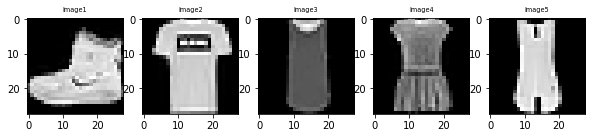

time: 1 s (started: 2021-12-15 00:20:38 +00:00)


In [76]:
n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(train_images_f[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

In [77]:
from sklearn.preprocessing import StandardScaler
# Standardizing
train_img_std = StandardScaler().fit_transform(train_images_f)
test_img_std = StandardScaler().fit_transform(test_images_f)

time: 868 ms (started: 2021-12-15 00:20:39 +00:00)


Below you can see the images **after** standardization and normalization;

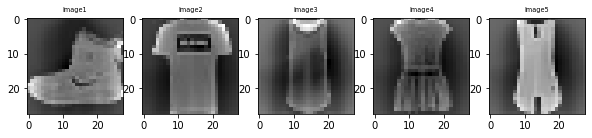

time: 751 ms (started: 2021-12-15 00:20:40 +00:00)


In [78]:

n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(train_img_std[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

# 8.1 Computing Eigenvectors Eigenvalues and Covariance Matrix

We want to find the parameter k for PCA

PCA tries to minimize the average squared projection errors: $$\frac{1}{m} \sum^{m}_{i=1} || x^{(i)} - x^{(i)}_{approx} ||^2$$
And the total variation in the data: $$\frac{1}{m}\sum^{m}_{i=1}||x^{(i)}||^2$$

We want to choose **k** such that it is the smallest value of the ratio between the average squared projection errors and the total variation in the data: 


$\frac{\frac{1}{m}\sum^{m}_{i=1}||x^{(i)}-x^{(i)}_{approx}||^2}{\frac{1}{m}\sum^{m}_{i=1}||x^{(i)}||^2} \leq 0.01$ 

So we want to retain 99% of the variance!

In [79]:
mean_vec = np.mean(train_img_std, axis=0)
cov_mat = np.cov(train_img_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print("Shape of Covariance matrix: ", cov_mat.shape)
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse=True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

Shape of Covariance matrix:  (784, 784)
time: 1.87 s (started: 2021-12-15 00:20:41 +00:00)


In [80]:
# played with k until I had 99.00 % of the variance retained.
cmp_n = 526
add = 0.0
for i in range(cmp_n):
    add+= var_exp[i]

print('first ',cmp_n,' components average variance: %.2f' % add)  

first  526  components average variance: 99.00
time: 6.73 ms (started: 2021-12-15 00:20:42 +00:00)


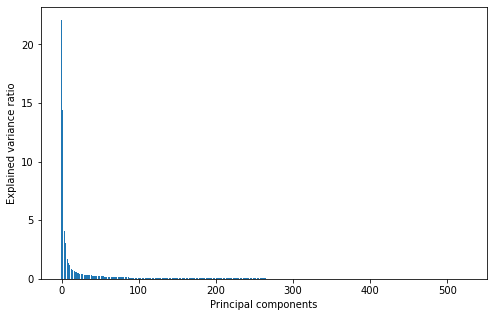

time: 1.49 s (started: 2021-12-15 00:20:42 +00:00)


In [81]:
size = cmp_n
plt.figure(figsize=(8,5))
plt.bar(range(size), var_exp[0:size], align='center');
plt.xlabel("Principal components")
plt.ylabel("Explained variance ratio");

# what happened to the colors??? --> sns.set() messed it up


In [82]:
pca = PCA(n_components=cmp_n)
X_train_pca = pca.fit_transform(train_img_std) # input for svm.fit()
X_test_pca = pca.fit_transform(test_img_std) # input for svm.predict()


time: 23.3 s (started: 2021-12-15 00:20:44 +00:00)


Eigenvalues shape: (526, 784)


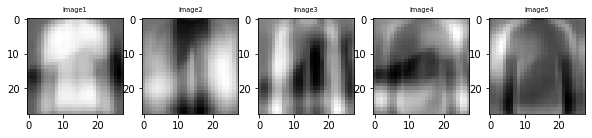

time: 650 ms (started: 2021-12-15 00:21:07 +00:00)


In [83]:
eigenvalues = pca.components_.reshape(cmp_n, 28, 28)
eigenvalues = pca.components_
print("Eigenvalues shape:", eigenvalues.shape)

n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(eigenvalues[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

# SVM with PCA input

In [84]:
start_svm_pca = time.time()

# Training support vector classifyer
svm_cls_pca = SVC(kernel='rbf', C=100, gamma='auto')
# Fit the classifier to training data:
svm_cls_pca.fit(X_train_pca, train_labels)

end_svm_pca = time.time()
svm_pca_time = end_svm_pca-start_svm_pca

time: 6min 57s (started: 2021-12-15 00:21:08 +00:00)


starting svm prediction with pca input 
              precision    recall  f1-score   support

           0       0.59      0.72      0.65      1000
           1       0.99      0.88      0.93      1000
           2       0.49      0.60      0.54      1000
           3       0.76      0.73      0.74      1000
           4       0.57      0.40      0.47      1000
           5       0.73      0.66      0.70      1000
           6       0.32      0.31      0.31      1000
           7       0.69      0.74      0.72      1000
           8       0.84      0.93      0.88      1000
           9       0.85      0.81      0.83      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



-----------------SVM Report---------------
F1 score: 0.6769611733923353
Accuracy score: 0.6787
Confusion matrix: 





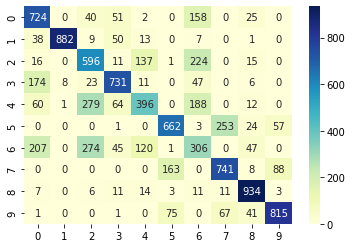

time: 2min 25s (started: 2021-12-15 00:28:05 +00:00)


In [85]:
# SVM predictions and analysis
print('starting svm prediction with pca input ')
svm_pca_pred = svm_cls_pca.predict(X_test_pca)
svm_pca_f1 = metrics.f1_score(test_labels, svm_pca_pred, average= "weighted")
svm_pca_accuracy = metrics.accuracy_score(test_labels, svm_pca_pred)
svm_pca_cm = metrics.confusion_matrix(test_labels, svm_pca_pred)

print(metrics.classification_report(test_labels, svm_pca_pred))
print('\n')
print('-----------------SVM Report---------------')
print('F1 score: {}'.format(svm_pca_f1))
print('Accuracy score: {}'.format(svm_pca_accuracy))
print('Confusion matrix: \n')
print('\n')

sns.heatmap(svm_pca_cm, annot=True, fmt='d', cmap='YlGnBu')

The accuracy was just 68,1% which is not good enough which is why I will proceed with a 5-fold cross validation on a reduced set below.

## 4.2 SVM Grid Search 5-fold Cross Validation on Reduced Set

To avoid time out again I had to find a creative way to reduce computational time of the grid search with 5-fold corss validation. I decided to use only the training set (as imported from `tf.keras`) for train test splits. 

Further I will do the **oposite** of what is usually done: I will use the **smaller portion** for **training** as it is more computationally intensive than testing.

I will use 20% of the 60 000 samples for training, while I will use the bulk of the samples for (80%) for testing. 

I chose this as I wanted to speed up the step of the grid search. From the grid search we can find the best parameters. I will use them to train a model using the entire input and testing on the corresponding testing set.

Once the best parameters are found, I will test it on the **original test splits** as imported from `tf.keras` which will be used as the **blind test set** or **hold out set**. 

The CV will be done by using the `train_test_split` function but this time only on the `train_images_f` and corresponding `train_labels` data set. 

The model with the parameters that have obtained the best results will then be used on the `test_images_f` and corresponding `test_labels` for a final evaluation.

```
# gridsearch
grid = GridSearchCV(SVC(),svm_param_grid, refit=True, verbose = 3)
grid.fit(X_train, y_train)
```
Above we can see that I set the `refit` parameter `True` such that the best parameters will be used to train the final model.
```
# test model on test set and print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
```

Given that the classes within both training and testing set were perfectly balanced (see [2.4 Visualizing the distribution of classes within training and testing set](https://colab.research.google.com/drive/1gVS_R4GPpgS9GpumwBETzsln9vwhAfle#scrollTo=a51e_G8o4HaJ)) I expect the outcome to be ok despite the train test splits being of unusual percentages.

[A user's guide to support vector machines, Asa Ben-Hur, Jason Weston](https://pubmed.ncbi.nlm.nih.gov/20221922/)

In [86]:
# SVM Model: Reduced train set
# Grid search CV:

# Randomly picking ONLY 20 percent of the 60 000 entries for testing in 
# in the gridsearch.
# That way I can speed up the computation and still pick the best model
# This is obviously done only because this is an exercize to learn about the methods

# Total input = 60 000 samples from train_images_f
# test_size to 80% --> training size = 20%

# save time for comparisson with other methods
start_svm = time.time()
X_train, X_test, y_train, y_test = train_test_split(
    train_images_f, train_labels, test_size=0.80, stratify=train_labels) 

# stratify ensures that the same number of each class is present in each split.
svm_param_grid = {'C':[0.1, 1, 10, 100], 'gamma': ['auto'],
            'kernel': ['rbf', 'poly']}
grid = GridSearchCV(SVC(),svm_param_grid, refit=True, verbose = 3)
grid.fit(X_train, y_train)
# save timer for comparisson all methods 
end_svm = time.time()
svm_grid = end_svm-start_svm
# trained on 12 000 samples tested on 48 000
print(grid.cv_results_)

# printing best parameter after tuning
print(grid.best_params_)
 
# printing how my model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.735 total time=  36.9s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.732 total time=  36.9s
[CV 3/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.737 total time=  37.0s
[CV 4/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.744 total time=  36.9s
[CV 5/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.739 total time=  37.1s
[CV 1/5] END ....C=0.1, gamma=auto, kernel=poly;, score=0.299 total time=  58.1s
[CV 2/5] END ....C=0.1, gamma=auto, kernel=poly;, score=0.302 total time=  58.5s
[CV 3/5] END ....C=0.1, gamma=auto, kernel=poly;, score=0.301 total time=  58.1s
[CV 4/5] END ....C=0.1, gamma=auto, kernel=poly;, score=0.289 total time=  58.3s
[CV 5/5] END ....C=0.1, gamma=auto, kernel=poly;, score=0.284 total time=  57.8s
[CV 1/5] END .......C=1, gamma=auto, kernel=rbf;, score=0.809 total time=  18.5s
[CV 2/5] END .......C=1, gamma=auto, kernel=rbf;,

### 4.2.1 SVM Grid Search CV Best Parameters and Scores

In [87]:
# printing best parameter after tuning
print(grid.best_params_)
 
# printing how my model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
SVC(C=100, gamma='auto')
time: 1.99 ms (started: 2021-12-15 00:48:31 +00:00)


In [88]:
svm_cv_results = pd.DataFrame(grid.cv_results_)
svm_cv_results.iloc[grid.best_index_]

mean_fit_time                                             5.78243
std_fit_time                                            0.0788873
mean_score_time                                           5.64233
std_score_time                                          0.0768331
param_C                                                       100
param_gamma                                                  auto
param_kernel                                                  rbf
params               {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
split0_test_score                                        0.857083
split1_test_score                                          0.8475
split2_test_score                                         0.85875
split3_test_score                                          0.8625
split4_test_score                                          0.8575
mean_test_score                                          0.856667
std_test_score                                         0.00496516
rank_test_

time: 10.4 ms (started: 2021-12-15 00:48:31 +00:00)


In the output of the cell above we can see that the best performance was achieved with the following parameters: 

* rbf kernel
* C of 100
* $\gamma$ set to 'auto'

 ## 4.3 Performing predictions on 80% of training set

 That is 48 000 images saved to the variable `X_test` from the previous train test split:

 ```
 X_train, X_test, y_train, y_test = train_test_split(
    train_images_f, train_labels, test_size=0.80, stratify=train_labels) 
```

In [89]:
grid_pred_X_test = grid.predict(X_test)

time: 2min 25s (started: 2021-12-15 00:48:31 +00:00)


In [90]:
# printing the classification report
print(classification_report(y_test, grid_pred_X_test))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      4800
           1       0.98      0.97      0.97      4800
           2       0.77      0.78      0.77      4800
           3       0.87      0.87      0.87      4800
           4       0.79      0.81      0.80      4800
           5       0.94      0.94      0.94      4800
           6       0.69      0.62      0.66      4800
           7       0.92      0.93      0.93      4800
           8       0.96      0.95      0.96      4800
           9       0.95      0.94      0.95      4800

    accuracy                           0.87     48000
   macro avg       0.87      0.87      0.87     48000
weighted avg       0.87      0.87      0.87     48000

time: 94.1 ms (started: 2021-12-15 00:50:56 +00:00)


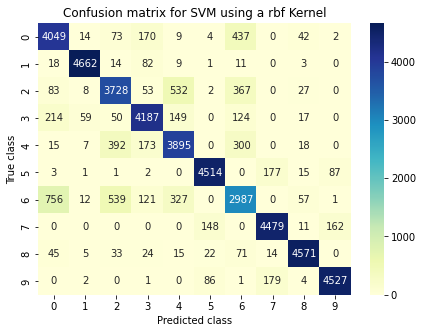

accuracy 0.8666458333333333 

time: 691 ms (started: 2021-12-15 00:50:56 +00:00)


In [91]:
confusion_rbf = confusion_matrix(y_test, grid_pred_X_test)
f,ax = plt.subplots(figsize=(7,5))
sns.heatmap(confusion_rbf,annot=True,cmap="YlGnBu",fmt='',ax=ax)
plt.title('Confusion matrix for SVM using a rbf Kernel')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

print("accuracy", metrics.accuracy_score(y_test, grid_pred_X_test), "\n")

## 4.4 Performing Predictions on the Blind Test Set

In [92]:
svm_blind_test = grid.predict(test_images_f)

time: 30 s (started: 2021-12-15 00:50:57 +00:00)


In [93]:
# printing the classification report
print(classification_report(test_labels, svm_blind_test))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1000
           1       0.97      0.96      0.97      1000
           2       0.75      0.77      0.76      1000
           3       0.86      0.86      0.86      1000
           4       0.77      0.80      0.78      1000
           5       0.94      0.94      0.94      1000
           6       0.67      0.59      0.63      1000
           7       0.92      0.94      0.93      1000
           8       0.94      0.95      0.95      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

time: 26.8 ms (started: 2021-12-15 00:51:27 +00:00)


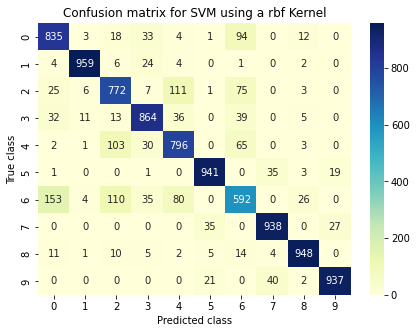

accuracy 0.8582 

time: 1.01 s (started: 2021-12-15 00:51:27 +00:00)


In [94]:
confusion_rbf = confusion_matrix(test_labels, svm_blind_test)
f,ax = plt.subplots(figsize=(7,5))
sns.heatmap(confusion_rbf,annot=True,cmap="YlGnBu",fmt='',ax=ax)
plt.title('Confusion matrix for SVM using a rbf Kernel')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

print("accuracy", metrics.accuracy_score(test_labels, svm_blind_test), "\n")

We can see that there was a slight drop in accuracy between the test set (`X_test`) and the **blind test set** (`test_labels`) predictions. The previously discussed pattern repeats as yet again class 6 has the lowest TPR. I ascribe this to the previously discussed similarity in pixel distribution [see linked plot from section 2.4.1](https://colab.research.google.com/drive/1sfiID3MhXOyF_xI_Q4U80VecAwBIR6YX#scrollTo=XtzN9bnwpuLq&line=1&uniqifier=1).

# 4.5 Generating New SVM Model on Entire Training Set

To see if I can get an even better accuracy I will repeat the training `train_images_f` whit a subsequent testing step on the `test_images_f`. This will create a classifies trained on **60 000** samples which will subsequntly be tested on the **10 000** test samples.

In [95]:
start_svm = time.time()

# Training support vector classifyer
svm_cls = SVC(kernel='rbf', C=100, gamma='auto')
# Fit the classifier to training data:
svm_cls.fit(train_images_f, train_labels)

end_svm = time.time()
svm_time = end_svm-start_svm

time: 6min 28s (started: 2021-12-15 00:51:28 +00:00)


starting svm prediction
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.79      0.82      0.80      1000
           3       0.87      0.89      0.88      1000
           4       0.80      0.81      0.81      1000
           5       0.96      0.96      0.96      1000
           6       0.72      0.66      0.69      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.96      0.96      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



-----------------SVM Report---------------
F1 score: 0.8800936656431503
Accuracy score: 0.8804
Confusion matrix: 



Plotting confusion matrix


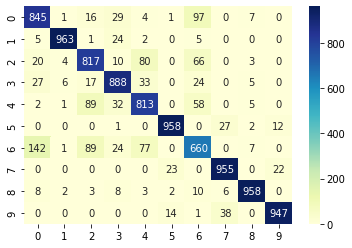

time: 2min 45s (started: 2021-12-15 00:57:56 +00:00)


In [96]:
# SVM predictions and analysis
print('starting svm prediction')
svm_predictions = svm_cls.predict(test_images_f)
svm_f1 = metrics.f1_score(test_labels, svm_predictions, average= "weighted")
svm_accuracy = metrics.accuracy_score(test_labels, svm_predictions)
svm_cm = metrics.confusion_matrix(test_labels, svm_predictions)

print(metrics.classification_report(test_labels, svm_predictions))
print('\n')
print('-----------------SVM Report---------------')
print('F1 score: {}'.format(svm_f1))
print('Accuracy score: {}'.format(svm_accuracy))
print('Confusion matrix: \n')
print('\n')
print('Plotting confusion matrix')

sns.heatmap(svm_cm, annot=True, fmt='d', cmap='YlGnBu')

By increasing the training data given in input I was able to increase accuracy by 3 percentage points from 85% to 88% on the testing set. Its not much but I did what I could to improve the performance of my SVM classifier.

<div>
   <img src="https://s2.qwant.com/thumbr/0x380/c/f/8fb4af1ef5c9807e47c01ac555160a2a39e0ec31ca0afd412a81a37fb4bc08/f06bdrfictf31.jpg?u=https%3A%2F%2Fi.redd.it%2Ff06bdrfictf31.jpg&q=0&b=1&p=0&a=0" width="200">
</div>

# 5 K-Nearest Neighbors

K-Nearest Neighbors (KNN) is one of the simplest algorithms used in ML and uses the training data given in input to classify new data points based on **similarity measures** such as the distance function. The classification is done by a majority vote to its **neighbors**. Choosing the $k$ in KNN is done by parameter tuning. 

The advantage of KNN is its time complexity $O(n*d)$

For: 

* $n$: number of points in the training dataset
* $d$: data dimensionality
* $k$: number of neighbors that we consider for voting


We can usse the following methods:

* Brute force method
    * Were 
        * training time complexity is $O(1)$
        * prediciton time is $O(k*n*d)$
        * prediciton space complexity is $O(1)
* $k-d$ tree method
    * Were
        * training time complexity is $O(d * n * log(n))$
        * training space complexity is $O(d * n)$
        * prediciton time complexity is $O(k * log(n))$
        * prediciton space complexity is $O(1)$
* Ball tree method
    * Where
        * training time complexity: O(d * n * log(n))
        * training space complexity: O(d * n)
        * prediction time complexity: O(k * log(n))
        * prediction space complexity: O(1)

Resources:

[KNN explained](https://towardsdatascience.com/k-nearest-neighbors-computational-complexity-502d2c440d5)

[Time complexity](https://stats.stackexchange.com/questions/219655/k-nn-computational-complexity)

[sklearn knn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)



The reocurring theme: class 6 has the lowest number of true positives.

In [97]:
## 1. KNN Model BRUTE FORCE = bf
start_knn_bf = time.time()

knn_bf = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
knn_bf.fit(train_images_f, train_labels)
knn_bf_pred_labels = knn_bf.predict(test_images_f)

end_knn_bf = time.time()
knn_bf_time = end_knn_bf-start_knn_bf

time: 26.2 s (started: 2021-12-15 01:00:41 +00:00)


In [98]:
## 2. KNN Model: k d tree = kd
start_knn_kd = time.time()

knn_kd = KNeighborsClassifier(n_neighbors=5)
knn_kd.fit(train_images_f, train_labels)
knn_kd_pred_labels = knn_kd.predict(test_images_f)

end_knn_kd = time.time()
knn_time_kd = end_knn_kd-start_knn_kd

time: 26 s (started: 2021-12-15 01:01:08 +00:00)


In [99]:
## 3. KNN Model: ball tree = bt
start_knn_bt = time.time()

knn_bt = KNeighborsClassifier(n_neighbors=5)
knn_bt.fit(train_images_f, train_labels)
knn_bt_pred_labels = knn_bt.predict(test_images_f)

end_knn_bt = time.time()
knn_time_bt = end_knn_bt-start_knn_bt

time: 26.1 s (started: 2021-12-15 01:01:34 +00:00)


## 5.1 Predictions of the three types of KNN

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.99      0.82      0.90      1000
           6       0.66      0.57      0.61      1000
           7       0.88      0.96      0.92      1000
           8       0.97      0.95      0.96      1000
           9       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



-----------------K-nearest Neighbors Brute Force Report---------------
F1 score:	 0.8546439722018904
Accuracy score:	 0.8554
Confusion matrix: 
 [[855   1  17  16   3   1 100   1   6   0]
 [  8 968   4  12   4   0   3   0   1   0]
 [ 24   

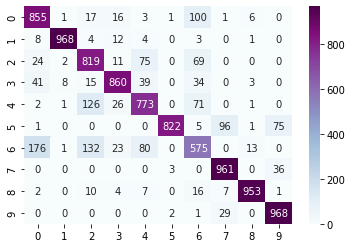

time: 796 ms (started: 2021-12-15 01:02:00 +00:00)


In [100]:
# KNN BRUTE FORCE report and analysis
knn_bf_f1 = metrics.f1_score(test_labels, knn_bf_pred_labels, average= 'weighted')
knn_bf_accuracy = metrics.accuracy_score(test_labels, knn_bf_pred_labels)
knn_bf_cm = metrics.confusion_matrix(test_labels, knn_bf_pred_labels)

print(metrics.classification_report(test_labels, knn_bf_pred_labels))
print('\n')
print('-----------------K-nearest Neighbors Brute Force Report---------------')
print('F1 score:\t {}'.format(knn_bf_f1))
print('Accuracy score:\t {}'.format(knn_bf_accuracy))
print('Confusion matrix: \n', knn_bf_cm)
print('\n')
print('Plotting confusion matrix')

sns.heatmap(knn_bf_cm, annot=True, fmt='d', cmap='BuPu')

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.99      0.82      0.90      1000
           6       0.66      0.57      0.61      1000
           7       0.88      0.96      0.92      1000
           8       0.97      0.95      0.96      1000
           9       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



-----------------K-nearest Neighbors k-d Tree Report---------------
F1 score:	 0.8546439722018904
Accuracy score:	 0.8554
Confusion matrix: 
 [[855   1  17  16   3   1 100   1   6   0]
 [  8 968   4  12   4   0   3   0   1   0]
 [ 24   2 8

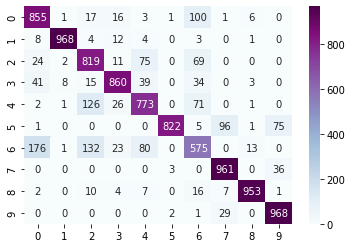

time: 786 ms (started: 2021-12-15 01:02:01 +00:00)


In [101]:
# KNN k-d Tree Report and Analysis
knn_kd_f1 = metrics.f1_score(test_labels, knn_kd_pred_labels, average= 'weighted')
knn_kd_accuracy = metrics.accuracy_score(test_labels, knn_kd_pred_labels)
knn_kd_cm = metrics.confusion_matrix(test_labels, knn_kd_pred_labels)

print(metrics.classification_report(test_labels, knn_kd_pred_labels))
print('\n')
print('-----------------K-nearest Neighbors k-d Tree Report---------------')
print('F1 score:\t {}'.format(knn_kd_f1))
print('Accuracy score:\t {}'.format(knn_kd_accuracy))
print('Confusion matrix: \n', knn_kd_cm)
print('\n')
print('Plotting confusion matrix')

sns.heatmap(knn_kd_cm, annot=True, fmt='d', cmap='BuPu')

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.99      0.82      0.90      1000
           6       0.66      0.57      0.61      1000
           7       0.88      0.96      0.92      1000
           8       0.97      0.95      0.96      1000
           9       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



-----------------K-nearest Neighbors Ball Tree Report---------------
F1 score:	 0.8546439722018904
Accuracy score:	 0.8554
Confusion matrix: 
 [[855   1  17  16   3   1 100   1   6   0]
 [  8 968   4  12   4   0   3   0   1   0]
 [ 24   2 

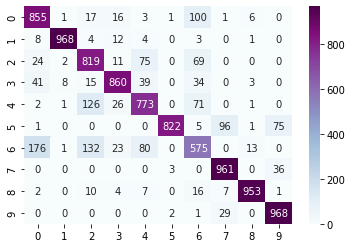

time: 793 ms (started: 2021-12-15 01:02:02 +00:00)


In [102]:
# KNN Ball Tree Report and Analysis
knn_bt_f1 = metrics.f1_score(test_labels, knn_bt_pred_labels, average= 'weighted')
knn_bt_accuracy = metrics.accuracy_score(test_labels, knn_bt_pred_labels)
knn_bt_cm = metrics.confusion_matrix(test_labels, knn_bt_pred_labels)

print(metrics.classification_report(test_labels, knn_bt_pred_labels))
print('\n')
print('-----------------K-nearest Neighbors Ball Tree Report---------------')
print('F1 score:\t {}'.format(knn_bt_f1))
print('Accuracy score:\t {}'.format(knn_bt_accuracy))
print('Confusion matrix: \n', knn_bt_cm)
print('\n')
print('Plotting confusion matrix')

sns.heatmap(knn_bt_cm, annot=True, fmt='d', cmap='BuPu')

In [103]:
print('-----------------K-nearest Neighbors Brute Force Report---------------')
print('F1 score:\t {}'.format(knn_bf_f1))
print('Accuracy score:\t {}'.format(knn_bf_accuracy))
print('\n')

print('\n')
print('-----------------K-nearest Neighbors k-d Tree Report---------------')
print('F1 score:\t {}'.format(knn_kd_f1))
print('Accuracy score:\t {}'.format(knn_kd_accuracy))
print('\n')

print('\n')
print('-----------------K-nearest Neighbors Ball Tree Report---------------')
print('F1 score:\t {}'.format(knn_bt_f1))
print('Accuracy score:\t {}'.format(knn_bt_accuracy))
print('\n')

-----------------K-nearest Neighbors Brute Force Report---------------
F1 score:	 0.8546439722018904
Accuracy score:	 0.8554




-----------------K-nearest Neighbors k-d Tree Report---------------
F1 score:	 0.8546439722018904
Accuracy score:	 0.8554




-----------------K-nearest Neighbors Ball Tree Report---------------
F1 score:	 0.8546439722018904
Accuracy score:	 0.8554


time: 9.49 ms (started: 2021-12-15 01:02:02 +00:00)


Above we can see that all KNN methods yeilded the same accuracy (\~85,6%) and F1 (\~85,5%) score. Despite the large amount of input all three methods terminated training and prediction within milliseconds. 

# 6 Decision Tree Classifier

Decision Trees (DT) are amongst the most popular algorithms for data mining and artificial intelligence. DT is a supervised learning model that can be used to solve classification as well as regression problems. It uses a tree-like model of decisions and their possible concequences to solve the problem. Each internal node represents an attribute and each leaf node represents a class label [see](https://en.wikipedia.org/wiki/Decision_tree). The advantage of DT is that it requires very little preparation of data when comparing it to other methods. In addition the training process is rather fast in comarision to other methods.

As always, overfitting can be an issue but this can be mitigated by setting a **maximum depth of the tree**, a **minimum number of samples required at a leaf split**, a **dimensionality reduction** or **pruning**. The simpler the model the less likely it is overfitting.


We flatten and reshape the data.

We do several trees with different depths rangeing from 1 - 30. We decide the desired depth according to the plateau of the accuracy.


In [104]:
# list holding accuracy of DT:
dt_acc = []

# loop for generating different trees:
for i in range(30):
  # decision tree classifier = dt_clf
  dt_clf = tree.DecisionTreeClassifier(max_depth=i+1, random_state=0)
  # fitting model
  dt_clf.fit(train_images_f, train_labels)
  # predictions; dt_pred
  dt_pred =  dt_clf.predict(test_images_f)
  # appending acc score to dt_acc
  dt_acc.append(accuracy_score(test_labels, dt_pred))
  # to stdout
  print('Depth: ', (i+1), 'Accuracy: ', accuracy_score(test_labels, dt_pred))



Depth:  1 Accuracy:  0.1992
Depth:  2 Accuracy:  0.3543
Depth:  3 Accuracy:  0.4988
Depth:  4 Accuracy:  0.6446
Depth:  5 Accuracy:  0.6938
Depth:  6 Accuracy:  0.7199
Depth:  7 Accuracy:  0.7555
Depth:  8 Accuracy:  0.7818
Depth:  9 Accuracy:  0.7973
Depth:  10 Accuracy:  0.8008
Depth:  11 Accuracy:  0.805
Depth:  12 Accuracy:  0.8022
Depth:  13 Accuracy:  0.8111
Depth:  14 Accuracy:  0.8087
Depth:  15 Accuracy:  0.8072
Depth:  16 Accuracy:  0.8064
Depth:  17 Accuracy:  0.8039
Depth:  18 Accuracy:  0.8012
Depth:  19 Accuracy:  0.7991
Depth:  20 Accuracy:  0.7984
Depth:  21 Accuracy:  0.7969
Depth:  22 Accuracy:  0.7976
Depth:  23 Accuracy:  0.7962
Depth:  24 Accuracy:  0.7963
Depth:  25 Accuracy:  0.7957
Depth:  26 Accuracy:  0.7931
Depth:  27 Accuracy:  0.7951
Depth:  28 Accuracy:  0.7959
Depth:  29 Accuracy:  0.7941
Depth:  30 Accuracy:  0.7901
time: 12min 1s (started: 2021-12-15 01:02:02 +00:00)


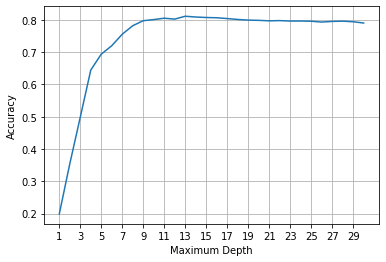

time: 225 ms (started: 2021-12-15 01:14:03 +00:00)


In [105]:
plt.plot(list(range(1,31)), dt_acc)
plt.xticks(list(range(1,31,2)))
plt.ylabel('Accuracy')
plt.xlabel('Maximum Depth')
plt.grid(True)

# test_images.shape

## 6.1 Training the DT Classifier with a Maximum Depth of 13

We can see in the plot above that the accuracy starts to flatten out after a peak at 13. Thus I will run DT training with the maximum depth of 13.

In [106]:
# Decision Tree
start_dt = time.time()

tree_cls = DecisionTreeClassifier(max_depth=13, criterion='entropy')
tree_cls.fit(train_images_f, train_labels)

end_dt = time.time()
dt_time = end_dt-start_dt


time: 34.5 s (started: 2021-12-15 01:14:04 +00:00)


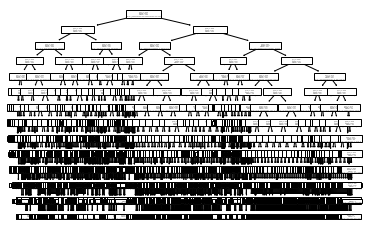

<Figure size 36000x21600 with 0 Axes>

time: 2min 27s (started: 2021-12-15 01:14:38 +00:00)


In [107]:
dt_image = tree_cls.fit(train_images_f,train_labels)
tree.plot_tree(dt_image)
plt.figure(figsize=(500, 300))
plt.show()

Given the input is pixles the decision tree is not informative to the human eye. I still left it in the report as it shows that the package is capable of visualizing the decision tree.

Evaluating DT using a confusion matrix

## 6.2 Prediction using the Decision Tree Classifier

In [108]:
dt_predictions = tree_cls.predict(test_images_f)
print(f'Decision Tree Classification Report \n Decision Tree with a Depth of 13: \n {classification_report(test_labels,dt_predictions)}')

Decision Tree Classification Report 
 Decision Tree with a Depth of 13: 
               precision    recall  f1-score   support

           0       0.76      0.77      0.77      1000
           1       0.96      0.94      0.95      1000
           2       0.69      0.72      0.70      1000
           3       0.83      0.80      0.82      1000
           4       0.68      0.74      0.71      1000
           5       0.91      0.89      0.90      1000
           6       0.60      0.54      0.57      1000
           7       0.87      0.88      0.88      1000
           8       0.92      0.93      0.93      1000
           9       0.91      0.92      0.91      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

time: 49.6 ms (started: 2021-12-15 01:17:05 +00:00)


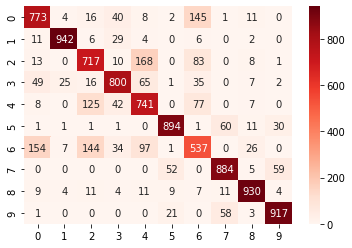

time: 1.02 s (started: 2021-12-15 01:17:05 +00:00)


In [109]:
dt_confusion = confusion_matrix(test_labels, dt_predictions)
sns.heatmap(dt_confusion, annot=True, fmt='d', cmap='Reds')

In [110]:
print("Accuracy:", accuracy_score(test_labels, dt_predictions))

Accuracy: 0.8135
time: 2.71 ms (started: 2021-12-15 01:17:06 +00:00)


From the confusion matrix we can see that class 1 the trousers, have the highest true positives, while the class 6, the shirt has the lowest. This can again be explained by the similarity between all long armed apparrel, which might even be confused by the human eye. The trousers and the T-shirt on the other hand, has short arms which is reflected in a more distinguished pixel distribution and a better TPR. The overall accuracy of the decision tree reached 81.38% 

# 7 Random Forest Classifier

Random forest (RF) is a machine learning algorithm that combines the output of multible decision trees to reach a single result. Like DT it can solve both classification and regression problems.


In [111]:
# Random Forest
start_rf = time.time()

random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
random_forest.fit(train_images_f, train_labels)

end_rf = time.time()
rf_time = end_rf-start_rf


time: 1min 55s (started: 2021-12-15 01:17:06 +00:00)


In [112]:
rf_predictions = random_forest.predict(test_images_f)

time: 466 ms (started: 2021-12-15 01:19:02 +00:00)


In [113]:
rf_report = classification_report(test_labels, rf_predictions)
print('Classification Report \n Random Forest: ',rf_report)

accuracy = accuracy_score(test_labels,rf_predictions)
print("Accuracy: ",accuracy)

Classification Report 
 Random Forest:                precision    recall  f1-score   support

           0       0.81      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.77      0.81      0.79      1000
           3       0.88      0.91      0.89      1000
           4       0.77      0.82      0.80      1000
           5       0.98      0.96      0.97      1000
           6       0.73      0.58      0.65      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Accuracy:  0.8774
time: 29.3 ms (started: 2021-12-15 01:19:02 +00:00)


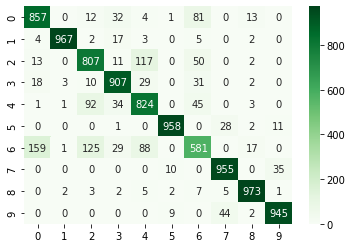

time: 755 ms (started: 2021-12-15 01:19:02 +00:00)


In [114]:
rf_confusion = confusion_matrix(test_labels, rf_predictions)
sns.heatmap(rf_confusion, annot=True, fmt="d", cmap="Greens")

The random forest clasifier outperformed the decision tree by aproximately 6 percentage points with an accuracy of 87,6%. Yet again the shirt (class 6) has the lowest level of correct classifications. To see if this score can still be improved I will do a cross validation.

# 7.1 Five-Fold Cross Validation on Random Forest Classifier

In [115]:
X = np.vstack((test_images_f,train_images_f))
y = np.concatenate((test_labels, train_labels))
scores = cross_val_score(random_forest, X,y,cv=5, scoring='accuracy', verbose=3)
print(np.mean(scores))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.878) total time= 1.8min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s


[CV] END ................................ score: (test=0.883) total time= 1.8min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.6min remaining:    0.0s


[CV] END ................................ score: (test=0.886) total time= 1.8min
[CV] END ................................ score: (test=0.889) total time= 1.8min
[CV] END ................................ score: (test=0.884) total time= 1.8min
0.8838428571428573
time: 9min 10s (started: 2021-12-15 01:19:03 +00:00)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  9.2min finished


The accuracy improved from 87,6% to 88,4% after 5-fold cross validation.

# Comparing Run Time of the Different Implemented Classifyers

In [116]:
print('NN Time\t\t{:0.2f} minute'.format(nn_time/60.0))
print('CNN Time\t\t{:0.2f} minute'.format(cnn_time/60.0))
print('CNN Time\t\t{:0.2f} minute'.format(cnn2_time/60.0))
print('SVM Time\t\t{:0.2f} minute'.format(svm_time/60.0))
print('SVM PCA \t\t{:0.2f} minute'.format(svm_pca_time/60.0))
print('KNN bf Time\t\t{:0.2f} minute'.format(knn_bf_time/60.0))
print('KNN kd Time \t \t{:0.2f} minute'.format(knn_time_kd/60.0))
print('KNN bt Time \t \t{:0.2f} minute'.format(knn_time_bt/60.0))

print('Decision Tree Time: \t{:0.2f} minute'.format(dt_time/60.0))
print('Random Forest Time: \t{:0.2f} minute'.format(rf_time/60.0))
print('\n')

NN Time		0.75 minute
CNN Time		0.10 minute
CNN Time		0.16 minute
SVM Time		6.47 minute
SVM PCA 		6.96 minute
KNN bf Time		0.44 minute
KNN kd Time 	 	0.43 minute
KNN bt Time 	 	0.44 minute
Decision Tree Time: 	0.57 minute
Random Forest Time: 	1.92 minute


time: 6.41 ms (started: 2021-12-15 01:28:13 +00:00)


In [117]:
# # play sound when done ;)
# from google.colab import output
# output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/7/7f/Menura_novaehollandiae_-_Superb_Lyrebird_XC570705.mp3").play()')

KeyboardInterrupt: ignored

time: 6h 47min 46s (started: 2021-12-15 01:28:13 +00:00)


In [ ]:
# SVM Model: Entire data set

# Total input = 60 000 samples from train_images_f
# Test input = 10 000 samples from test_images_f

svm_parameters_grid = {'C':[0.1, 1, 10, 100], 'gamma':['auto'],
            'kernel': ['rbf', 'poly'], 'degree': [3,4,5]}
svm_grid = GridSearchCV(SVC(),svm_parameters_grid, refit = True, verbose = 3)
svm_grid.fit(train_images_f, train_labels) # fitting the model for grid search

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.1, degree=3, gamma=auto, kernel=rbf;, score=0.801 total time=18.3min
[CV 2/5] END C=0.1, degree=3, gamma=auto, kernel=rbf;, score=0.792 total time=18.4min
[CV 3/5] END C=0.1, degree=3, gamma=auto, kernel=rbf;, score=0.797 total time=18.4min
[CV 4/5] END C=0.1, degree=3, gamma=auto, kernel=rbf;, score=0.800 total time=18.6min


In [ ]:
# Play an audio beep. Any audio URL will do.
# from google.colab import output
# output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/9/95/Canto_del_Cucarachero_%28Troglodytes_aedon_%29.ogg").play()')

# to generating an error to avoid lines below being executed
# print(ANNA) 